# Import Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import json
from sklearn.tree import plot_tree

# Loading & Exploring Data

In [3]:
df = pd.read_csv('C:/Users/mdr/Desktop/data.csv')
df.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [4]:
df = df.copy()

In [5]:
selected_columns = [
    "PQdis", "QTdis", "STdis", "hbpermin", "QRdis", "RSdis",
    "QRSseg", "QRseg", "STseg", "Tseg", "QTseg", "Pseg", "PQseg",
    "QRslope", "RSslope", "STslope", "PQslope", "NNTot",
    "ECG_signal"
]
df = df[selected_columns]

# Data Preprocessing

In [6]:
df['PRseg'] = df['PQseg'] + df['QRseg']
df.drop(['PQseg', 'QRseg'], axis=1, inplace=True)

In [7]:
df['PRdis'] = df['PQdis'] + df['QRdis']
df['QRSdis'] = df['QRdis'] + df['RSdis']

In [8]:
df.drop(['QRdis', 'RSdis', 'PQdis'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QTdis       1200 non-null   float64
 1   STdis       1200 non-null   float64
 2   hbpermin    1200 non-null   float64
 3   QRSseg      1200 non-null   float64
 4   STseg       1200 non-null   float64
 5   Tseg        1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   Pseg        1200 non-null   float64
 8   QRslope     432 non-null    float64
 9   RSslope     431 non-null    float64
 10  STslope     1200 non-null   float64
 11  PQslope     1200 non-null   float64
 12  NNTot       1200 non-null   int64  
 13  ECG_signal  1200 non-null   object 
 14  PRseg       1200 non-null   float64
 15  PRdis       1200 non-null   float64
 16  QRSdis      1200 non-null   float64
dtypes: float64(15), int64(1), object(1)
memory usage: 159.5+ KB


# Time & Duration Features
Column	Description

QTdis	Duration of the QT interval (start of Q wave to end of T wave); reflects total time for ventricular depolarization and repolarization.

STdis	Duration of the ST segment; typically the flat section between the end of the S wave and the start of the T wave, used to detect ischemia or infarction.

QRSdis	Duration of the QRS complex; indicates time taken for ventricular depolarization.

PRdis	Duration of the PR interval; from the beginning of the P wave to the start of the QRS complex, representing atrial depolarization and AV node delay.

PRseg	Duration of the PR segment; time from the end of the P wave to the start of the QRS complex, showing AV nodal delay.

# QRSseg	Amplitude or length of the QRS segment; may indicate strength of ventricular contraction.
STseg	Amplitude or length of the ST segment; deviations may indicate ischemia or myocardial infarction.

Tseg	Amplitude or length of the T wave; reflects ventricular repolarization.

QTseg	Possibly a more refined QT segment metric (e.g., corrected QT interval, or some feature of QT waveform).

Pseg	Amplitude or duration of the P wave; represents atrial depolarization.

# other
hbpermin	Heartbeats per minute (Heart Rate).

NNTot	Total number of NN intervals (normal-to-normal beats); used in HRV (heart rate variability) analysis.

ECG_signal	Likely the raw or processed ECG signal stored as a string or array in object format. May need to be parsed.


In [10]:
df.drop(['QRslope', 'RSslope'], axis=1, inplace=True)

In [11]:
label_map = {'ARR': '0', 'AFF': '1', 'CHF': '2', 'NSR': '3'}
label_reverse_map = {v: k for k, v in label_map.items()}
df['ECG_signal'] = df['ECG_signal'].map(label_map)

In [12]:
df['ECG_signal'] = df['ECG_signal'].astype(int)

In [13]:
df.head()

,QTdis,STdis,hbpermin,QRSseg,STseg,Tseg,QTseg,Pseg,STslope,PQslope,NNTot,ECG_signal,PRseg,PRdis,QRSdis
0,69.501920,37.738343,74.925669,0.088254,0.104762,0.130476,0.193016,0.076508,0.012606,-0.014364,34,0,0.152460,54.872551,31.850507
1,69.648183,35.811162,68.503469,0.093924,0.099566,0.089149,0.193490,0.072483,0.016175,-0.021207,31,0,0.142448,51.324503,33.948986
2,48.013021,33.408047,83.488603,0.039530,0.092949,0.094444,0.132479,0.071154,0.027131,-0.042542,38,0,0.105199,38.162293,14.647385
3,67.970906,35.424510,68.503469,0.090365,0.098437,0.088281,0.188802,0.082812,0.017022,-0.017806,31,0,0.153385,55.300221,32.680305
4,69.758819,33.382822,82.080000,0.101023,0.092690,0.085965,0.193713,0.070760,0.016191,-0.016650,37,0,0.152047,54.826152,36.451966


In [14]:
df.describe()

,QTdis,STdis,hbpermin,QRSseg,STseg,Tseg,QTseg,Pseg,STslope,PQslope,NNTot,ECG_signal,PRseg,PRdis,QRSdis
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0000,1200.000000,1200.000000,1200.000000
mean,35.141710,23.236050,81.893980,0.048238,0.093303,0.102714,0.141541,0.060902,0.041659,-0.071647,93.631667,1.5000,0.102537,25.274859,12.003408
std,16.809520,9.214801,19.324351,0.034649,0.013332,0.022594,0.029225,0.009453,0.026456,0.049705,40.922445,1.1185,0.035964,15.113356,12.557771
min,12.083644,6.332043,12.857143,0.000000,0.052338,0.034936,0.098761,0.021556,0.008183,-0.219938,8.000000,0.0000,0.050000,7.079832,0.000000
25%,24.978347,13.851301,67.563000,0.015101,0.089423,0.090046,0.116016,0.053943,0.023853,-0.106660,65.000000,0.7500,0.068960,13.329788,0.062093
50%,28.802629,25.014005,79.872000,0.044692,0.097825,0.099210,0.137019,0.060642,0.034460,-0.058518,83.000000,1.5000,0.100561,18.823184,9.979094
75%,46.556688,27.500495,96.000000,0.083032,0.101200,0.112408,0.166314,0.066849,0.049778,-0.027685,110.750000,2.2500,0.136858,37.299925,23.156038
max,75.992131,50.505006,160.500000,0.120160,0.138444,0.198413,0.211111,0.095317,0.164633,-0.005427,163.000000,3.0000,0.200000,65.409180,43.330030


# Exploratory Data Analysis (EDA)

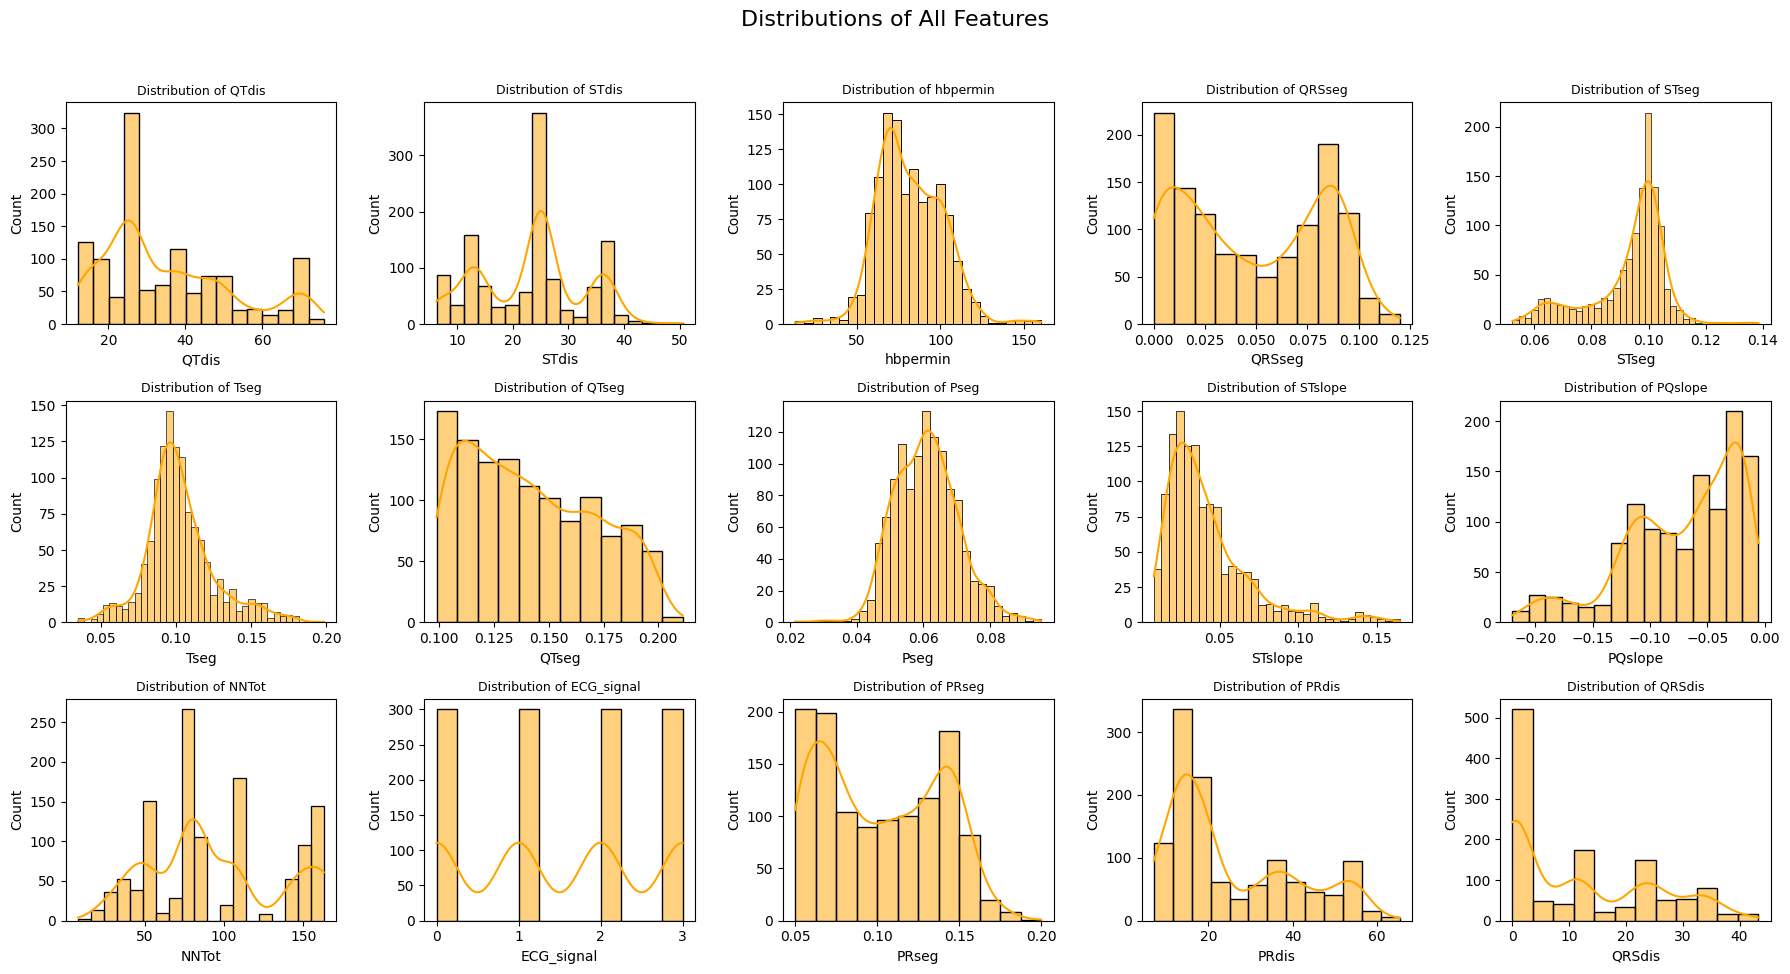

In [15]:
plt.figure(figsize=(18, 12))
for idx, col in enumerate(df, 1):
    plt.subplot(4, 5, idx)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'Distribution of {col}', fontsize=9)
    plt.tight_layout()
plt.suptitle("Distributions of All Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

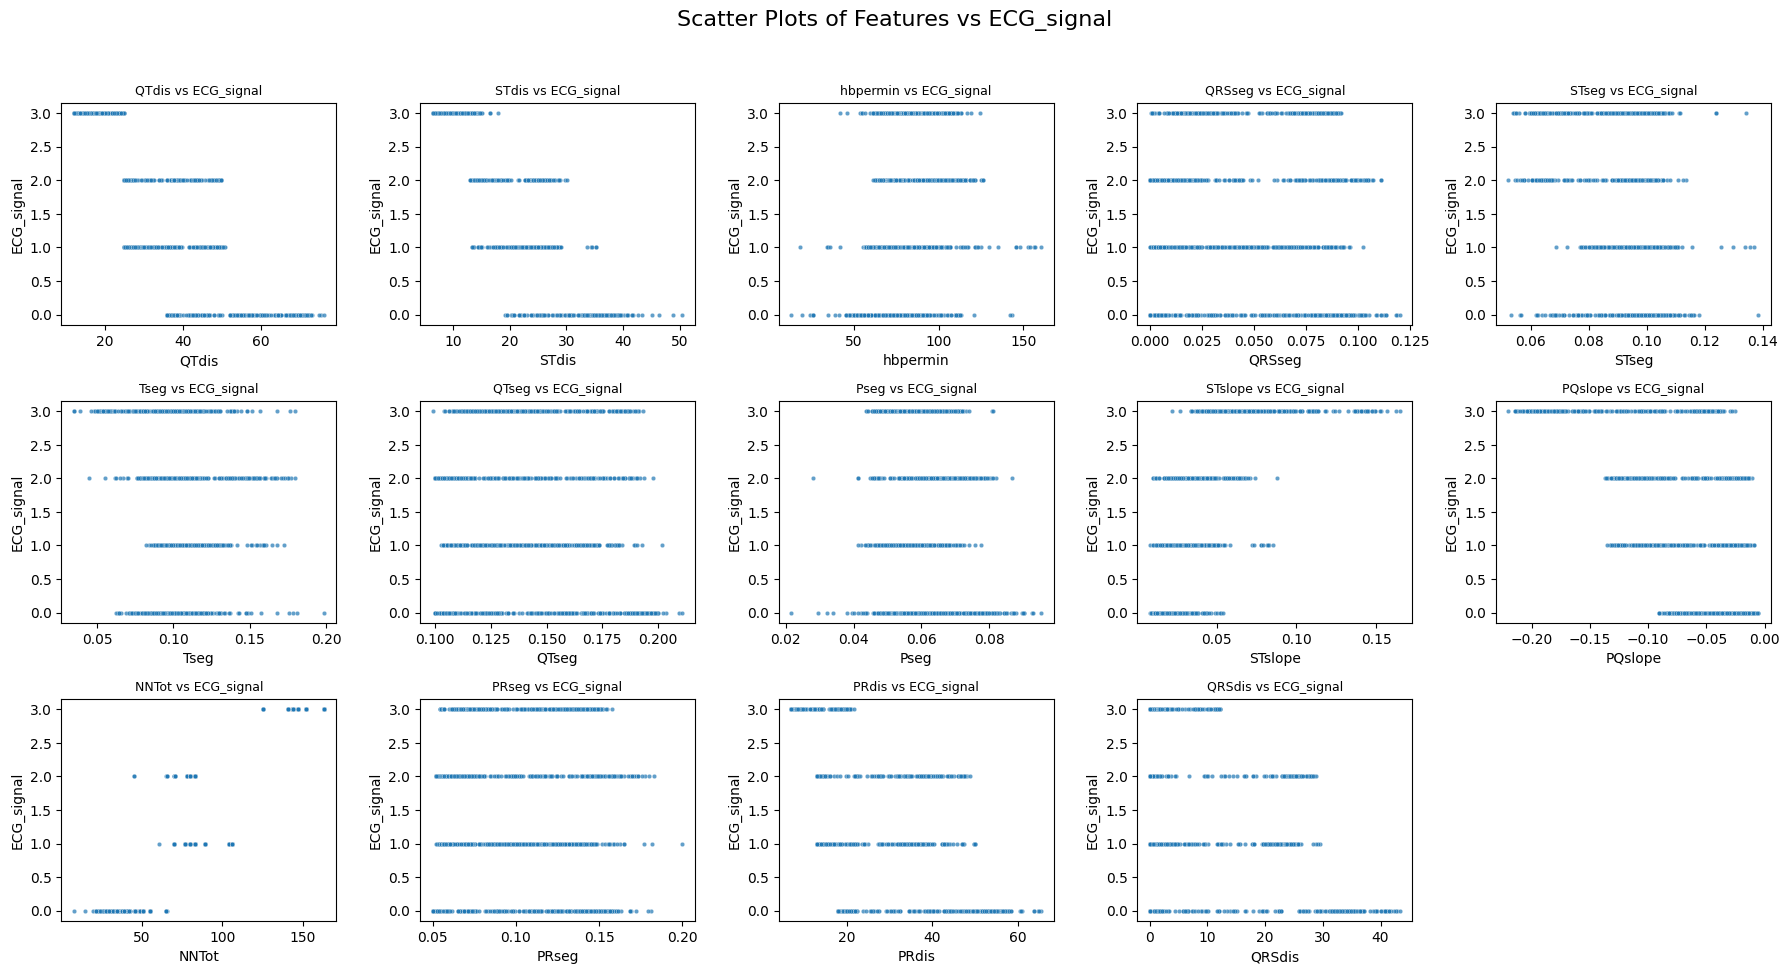

In [16]:
plt.figure(figsize=(18, 12))
for idx, col in enumerate(df.drop('ECG_signal', axis=1), 1):
    plt.subplot(4, 5, idx)
    sns.scatterplot(x=df[col], y=df["ECG_signal"], s=10, alpha=0.7)
    plt.title(f'{col} vs ECG_signal', fontsize=9)
    plt.tight_layout()
plt.suptitle("Scatter Plots of Features vs ECG_signal", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

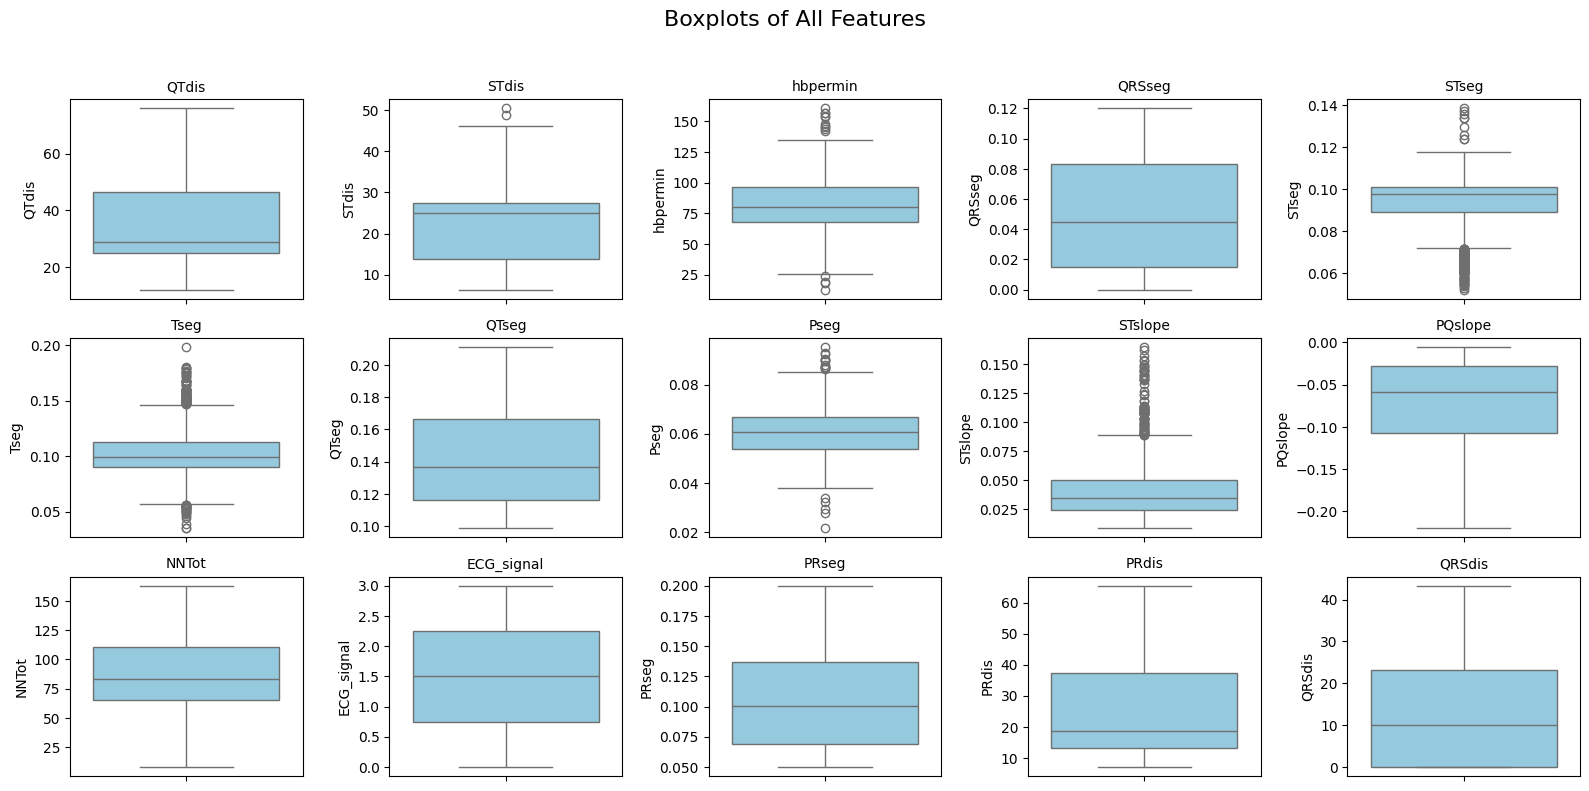

In [17]:
plt.figure(figsize=(16, 10))
for idx, col in enumerate(df, 1):
    plt.subplot(4, 5, idx) 
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.suptitle("Boxplots of All Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

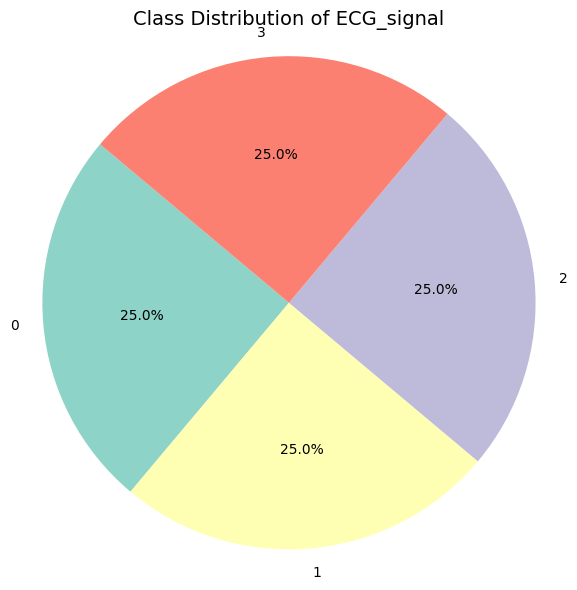

In [31]:
signal_counts = df['ECG_signal'].value_counts()
labels = signal_counts.index
sizes = signal_counts.values

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Class Distribution of ECG_signal', fontsize=14)
plt.axis('equal')  
plt.show()

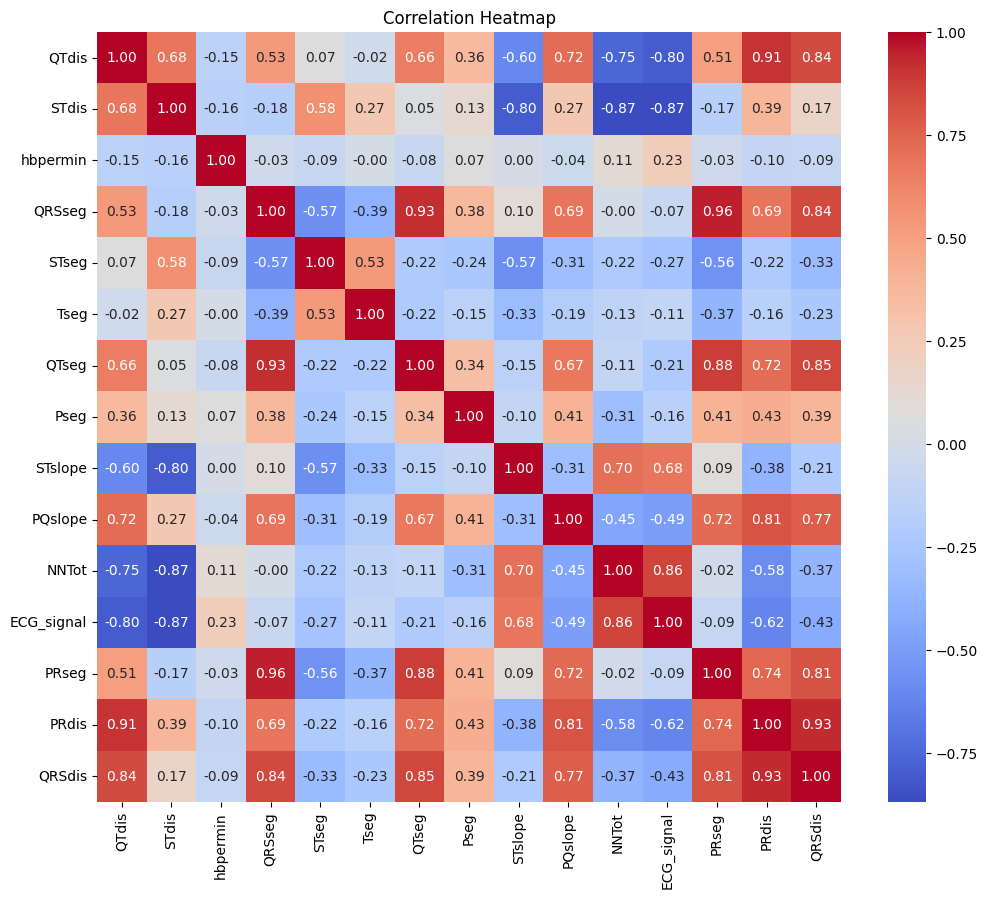

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Handle Outliers

In [20]:
for col in ['hbpermin', 'STseg', 'Tseg', 'Pseg', 'STslope']:
    df.loc[:, col] = mstats.winsorize(df[col], limits=[0.01, 0.03])

In [21]:
X = df.drop(['ECG_signal', 'QRSseg', 'PRdis'], axis=1)
y = df['ECG_signal']

# Split Data Into Train & Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Model Building & Training

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

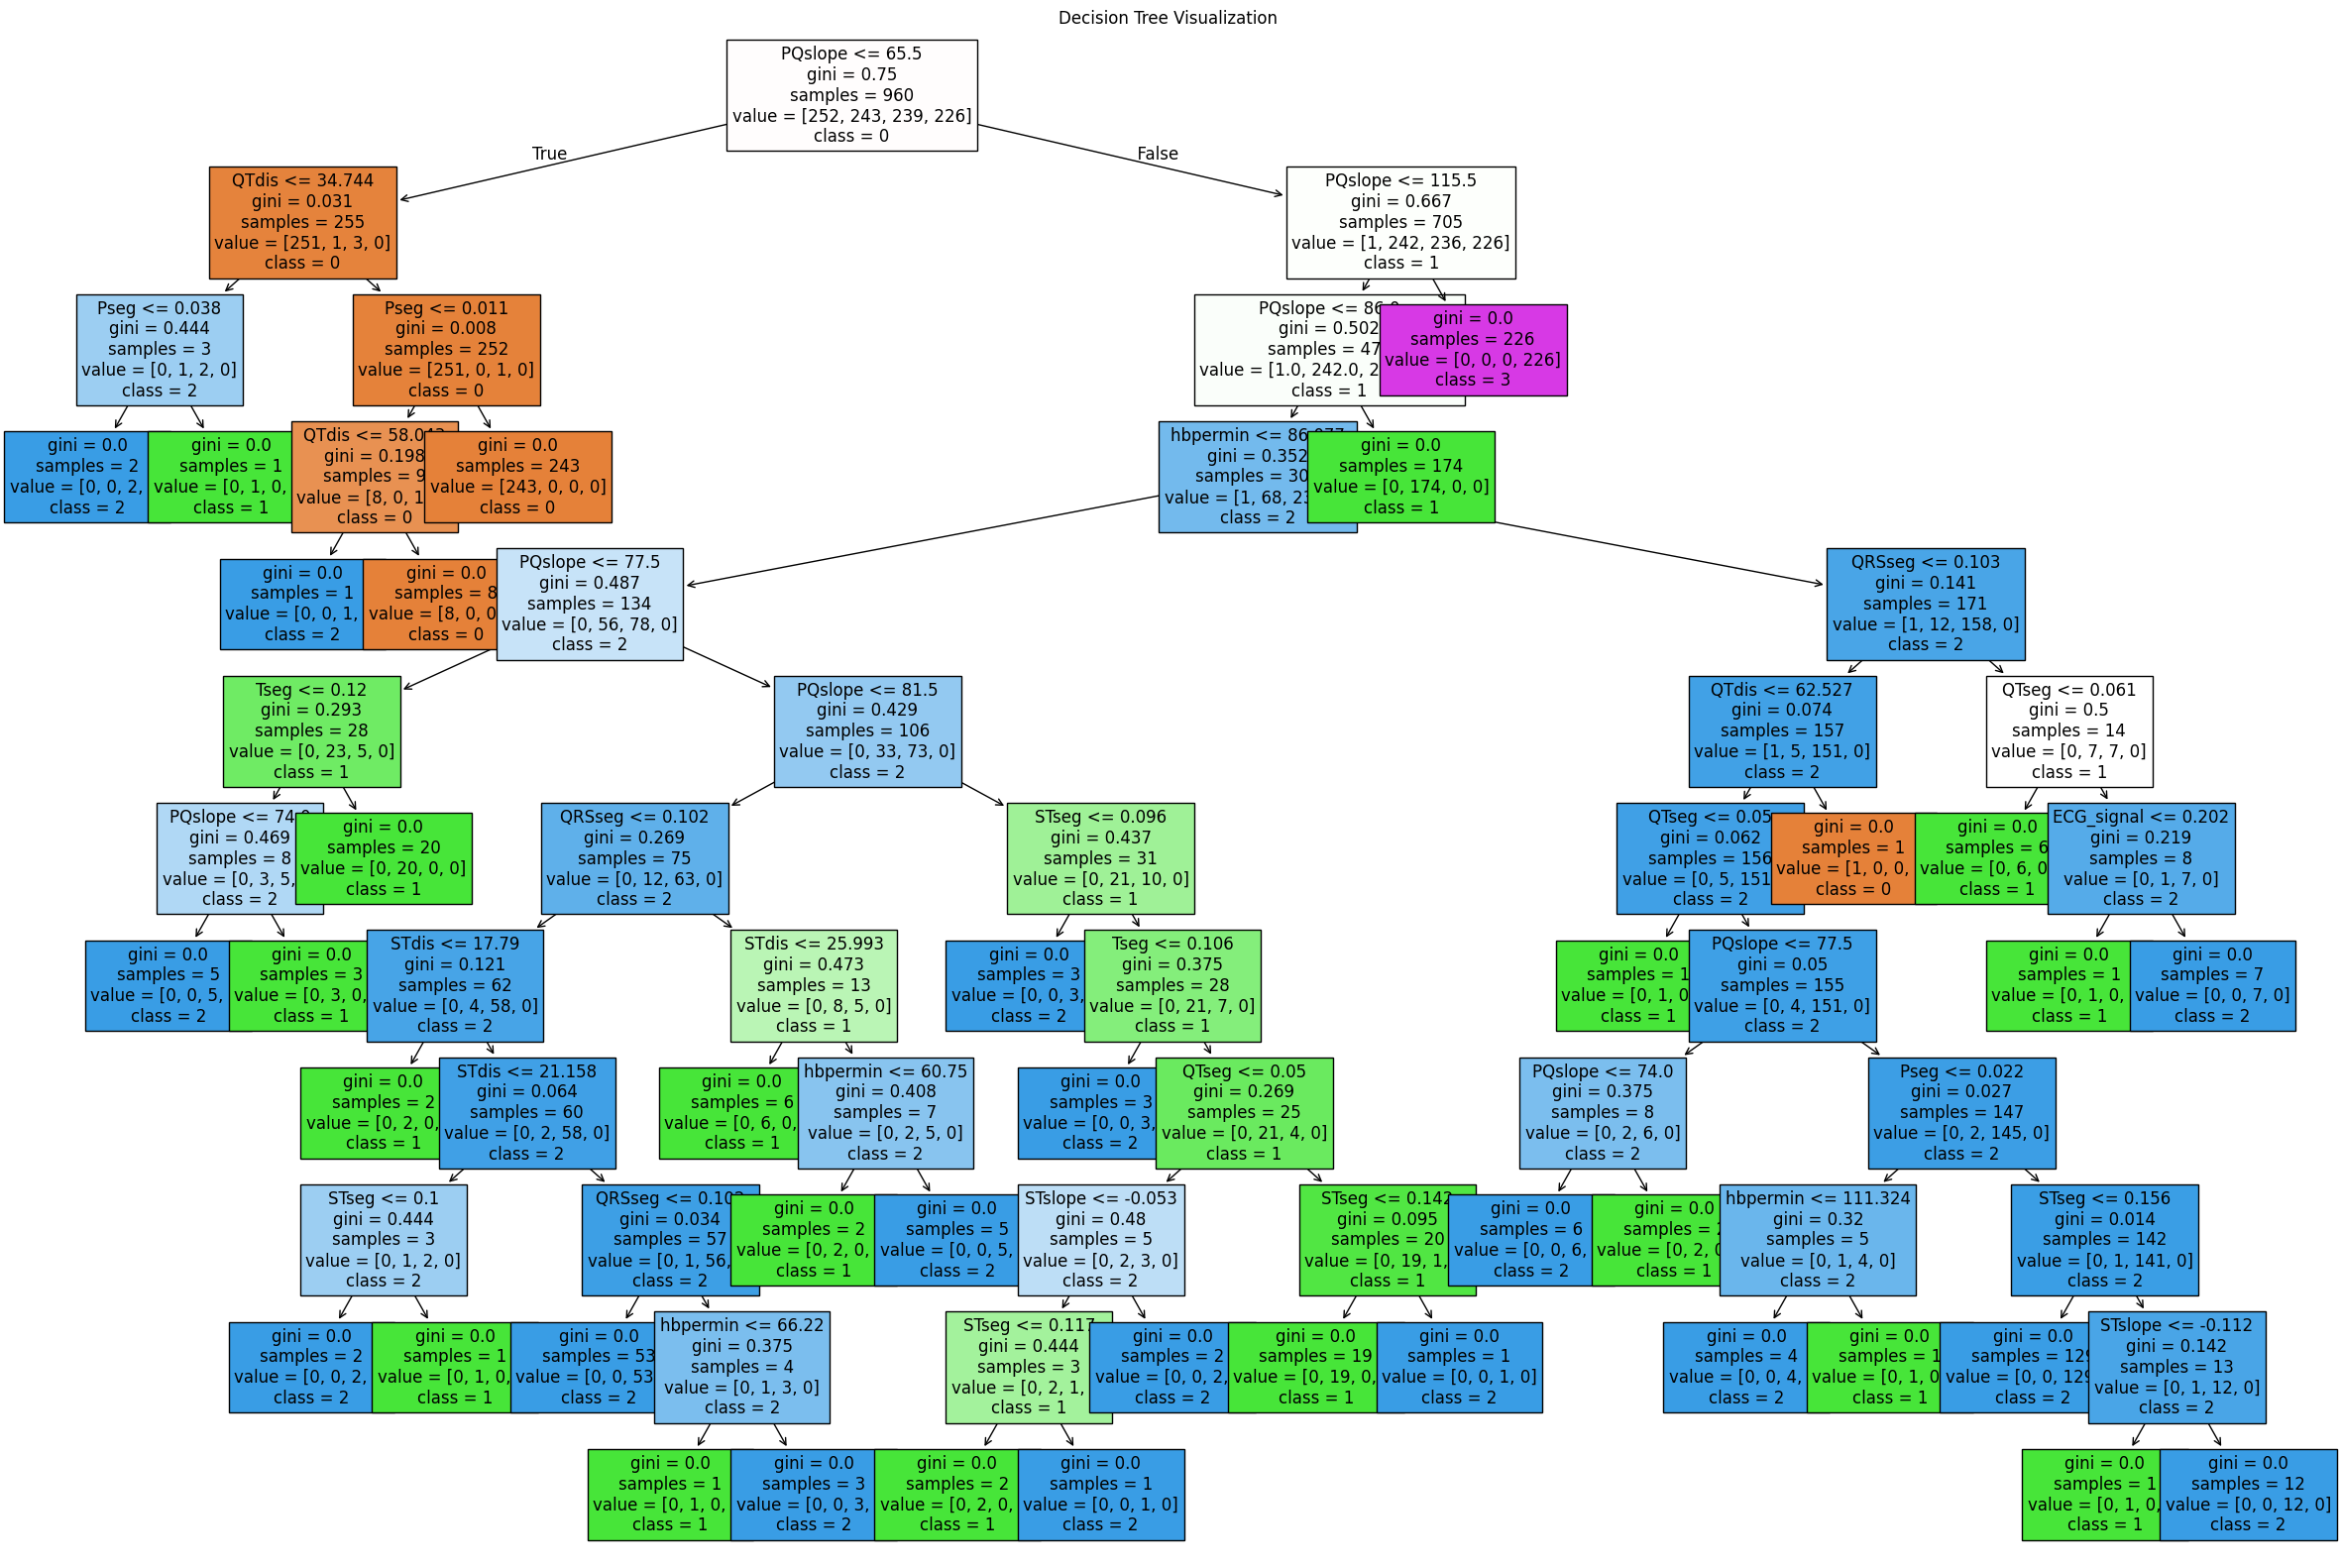

In [42]:
plt.figure(figsize=(30, 20))
plot_tree(model, 
          filled=True, 
          feature_names=df.columns, 
          class_names=list(label_map.values()), 
          fontsize=12, 
          proportion=False,  
          ) 
plt.title("Decision Tree Visualization")
plt.show()


# Model Evaluation

In [24]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9791666666666666


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      0.93      0.95        57
           2       0.94      0.98      0.96        61
           3       1.00      1.00      1.00        74

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



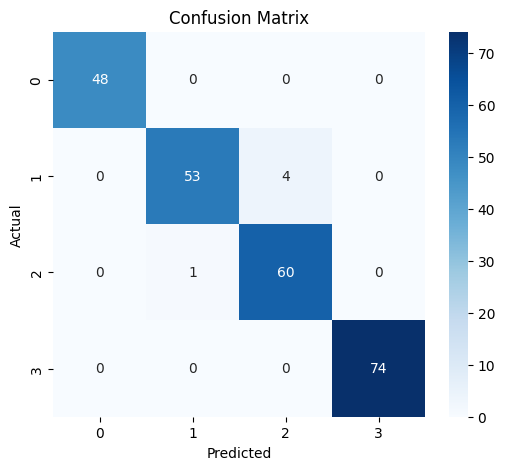

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
joblib.dump(model, 'ecg_decision_tree.pkl')

['ecg_decision_tree.pkl']

In [28]:
with open('ecg_feature_names.json', 'w') as f:
    json.dump(list(X.columns), f)


In [29]:
with open('label_reverse_map.json', 'w') as f:
    json.dump(label_reverse_map, f)